### Exercise 5.4

In [31]:
import numpy as np
import random
# TSP Data for a smaller set of points.
# This dataset represents a collection of coordinates (x, y) on a plane,
#  simulating locations of cities. The objective
# in a TSP is to find the shortest possible route that visits each point exactly once
# and returns to the origin point.
tsp_data = [
    (0.2554, 18.2366), (0.4339, 15.2476), (0.7377, 8.3137), (1.1354, 16.5638), (1.5820, 17.3030),
    (2.0913, 9.2924), (2.2631, 17.3392), (2.6373, 2.6425), (3.0040, 19.5712), (3.6684, 14.8018),
    (3.8630, 13.7008), (4.2065, 9.8224), (4.8353, 2.0944), (4.9785, 3.1596), (5.3754, 17.6381),
    (5.9425, 6.0360), (6.1451, 3.8132), (6.7782, 11.0125), (6.9223, 7.7819), (7.5691, 0.9378),
    (7.8190, 13.1697), (8.3332, 5.9161), (8.5872, 7.8303), (9.1224, 14.5889), (9.4076, 9.7166),
    (9.7208, 8.1154), (10.1662, 19.1705), (10.7387, 2.0090), (10.9354, 5.1813), (11.3707, 7.2406),
    (11.7418, 13.6874), (12.0526, 4.7186), (12.6385, 12.1000), (13.0950, 13.6956), (13.3533, 17.3524),
    (13.8794, 3.9479), (14.2674, 15.8651), (14.5520, 17.2489), (14.9737, 13.2245), (15.2841, 1.4455),
    (15.5761, 12.1270), (16.1313, 14.2029), (16.4388, 16.0084), (16.7821, 9.4334), (17.3928, 12.9692),
    (17.5139, 6.4828), (17.9487, 7.5563), (18.3958, 19.5112), (18.9696, 19.3565), (19.0928, 16.5453)
]

# TSP CoMoT Data for a larger set of points.
# Similar to the `tsp_data`, this dataset represents another set of coordinates
# on a plane.
tsp_comot_data = [
    (288, 149), (288, 129), (270, 133), (256, 141), (256, 157),
    (246, 157), (236, 169), (228, 169), (228, 161), (220, 169),
    (212, 169), (204, 169), (196, 169), (188, 169), (196, 161),
    (188, 145), (172, 145), (164, 145), (156, 145), (148, 145),
    (140, 145), (148, 169), (164, 169), (172, 169), (156, 169),
    (140, 169), (132, 169), (124, 169), (116, 161), (104, 153),
    (260, 77), (276, 77), (276, 69), (276, 61), (276, 53),
    (284, 53), (284, 61), (284, 69), (284, 77), (284, 85),
    (284, 93), (284, 101), (288, 109), (280, 109), (276, 101),
    (276, 93), (276, 85), (268, 97), (260, 109), (252, 101),
    (260, 93), (260, 85), (236, 85), (228, 85), (228, 93),
    (236, 93), (236, 101), (228, 101), (228, 109), (228, 117),
    (228, 125), (220, 125), (212, 117), (204, 109), (196, 101),
    (188, 93), (180, 93), (180, 101), (180, 109), (180, 117),
    (180, 125), (196, 145), (204, 145), (212, 145), (220, 145),
    (228, 145), (236, 145), (246, 141), (252, 125), (260, 129),
    (280, 133)
]




Best tour: [36, 38, 26, 23, 32, 33, 17, 40, 49, 47, 48, 37, 46, 41, 30, 34, 42, 44, 43, 45, 39, 28, 27, 12, 19, 18, 11, 22, 25, 7, 13, 16, 15, 31, 29, 35, 21, 24, 20, 9, 3, 1, 4, 0, 6, 8, 5, 2, 10, 14]
Best fitness (Total Distance): 219.8922151022543


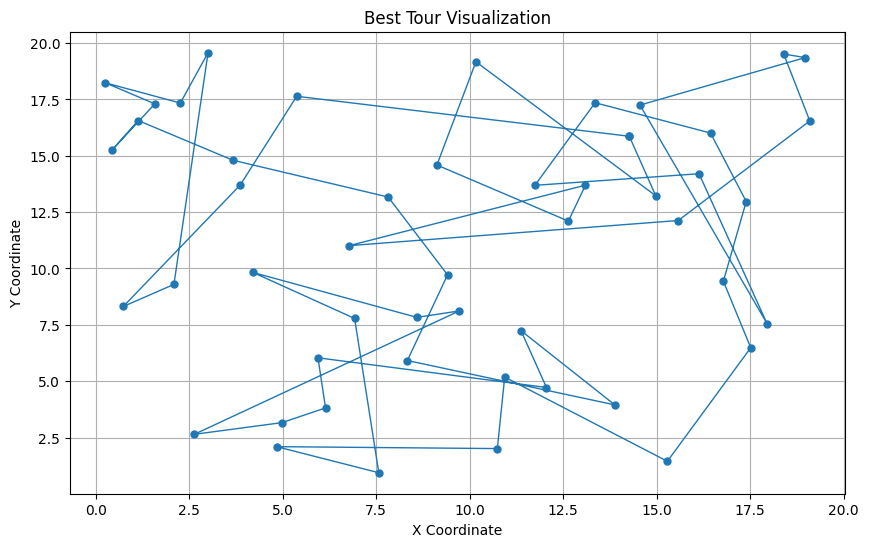

Best tour comot: [70, 74, 48, 47, 51, 46, 42, 39, 0, 80, 4, 40, 38, 36, 30, 54, 63, 65, 68, 8, 61, 57, 59, 49, 78, 14, 9, 58, 56, 66, 67, 50, 31, 43, 44, 52, 71, 73, 3, 2, 15, 10, 6, 60, 5, 45, 41, 1, 79, 53, 72, 16, 24, 17, 13, 7, 11, 12, 76, 75, 64, 21, 22, 23, 18, 29, 27, 20, 25, 26, 28, 19, 69, 37, 55, 32, 34, 35, 33, 77, 62]
Best fitness (Total Distance) comot: 2874.37045066441


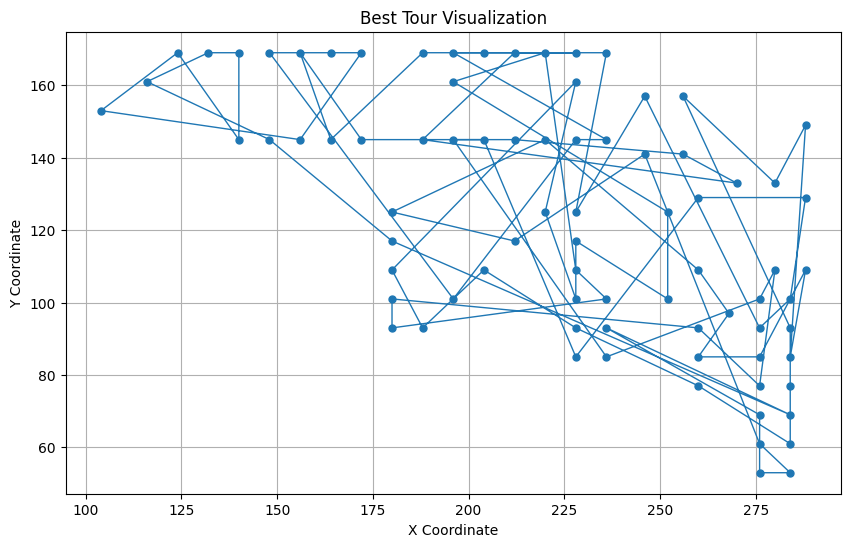

In [46]:
#simple EA for TSP
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two cities.
def distance(city1, city2):
    """
    Calculate the Euclidean distance between two points (cities).

    Parameters:
    - city1: A tuple containing the x and y coordinates of the first city.
    - city2: A tuple containing the x and y coordinates of the second city.

    Returns:
    - The Euclidean distance between city1 and city2.
    """
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)

# Function to create a distance matrix from the TSP data.
def create_distance_matrix(tsp_data):
    """
    Create a distance matrix for a given set of TSP data.

    Parameters:
    - tsp_data: A list of tuples, where each tuple represents the coordinates of a city.

    Returns:
    - A 2D NumPy array where element [i, j] is the distance between city i and city j.
    """
    num_cities = len(tsp_data)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = distance(tsp_data[i], tsp_data[j])
    return distance_matrix

# Initialize the population for the genetic algorithm.
def initialize_population(pop_size, num_cities):
    """
    Generate a population of random tours.

    Parameters:
    - pop_size: The size of the population.
    - num_cities: The number of cities in the TSP.

    Returns:
    - A list of tours, where each tour is a list representing a permutation of city indices.
    """
    population = [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]
    return population

# Calculate the fitness of a tour.
def calculate_fitness(tour, distance_matrix):
    """
    Calculate the total distance (fitness) of a tour.

    Parameters:
    - tour: A list of city indices representing the tour.
    - distance_matrix: The matrix containing distances between all pairs of cities.

    Returns:
    - The total distance of the tour.
    """
    return sum(distance_matrix[tour[i]][tour[(i + 1) % len(tour)]] for i in range(len(tour)))

# Perform tournament selection.
def tournament_selection(population, distance_matrix, tournament_size=3):
    """
    Select an individual from the population using tournament selection.

    Parameters:
    - population: The current population of tours.
    - distance_matrix: The matrix containing distances between all pairs of cities.
    - tournament_size: The number of individuals participating in each tournament.

    Returns:
    - The winning tour of the tournament.
    """
    best = None
    for _ in range(tournament_size):
        ind = random.choice(population)
        if best is None or calculate_fitness(ind, distance_matrix) < calculate_fitness(best, distance_matrix):
            best = ind
    return best

# Perform ordered crossover.
def ordered_crossover(parent1, parent2):
    """
    Generate an offspring using ordered crossover from two parent tours.

    Parameters:
    - parent1: The first parent tour.
    - parent2: The second parent tour.

    Returns:
    - offspring: A new tour generated from the parents.
    """
    size = len(parent1)
    start, stop = sorted(random.sample(range(size), 2))
    offspring = [None]*size
    offspring[start:stop] = parent1[start:stop]
    p2_index = stop
    for i in range(stop, stop + size):
        if parent2[i % size] not in offspring:
            offspring[p2_index % size] = parent2[i % size]
            p2_index += 1
    return offspring

# Mutate a tour.
def mutate(tour, mutation_rate):
    """
    Mutate a tour by swapping two cities with a specified mutation rate.

    Parameters:
    - tour: The tour to mutate.
    - mutation_rate: The probability of mutating each city in the tour.

    Returns:
    - The mutated tour.
    """
    for i in range(len(tour)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(tour) - 1)
            tour[i], tour[j] = tour[j], tour[i]
    return tour

# The main evolutionary algorithm.
def evolutionary_algorithm_for_plot(tsp_data, pop_size, num_generations, mutation_rate):
    num_cities = len(tsp_data)
    distance_matrix = create_distance_matrix(tsp_data)
    population = initialize_population(pop_size, num_cities)

    best_tour = None
    best_fitness = float('inf')
    population_fitness_history = []  # To store fitness history

    for generation in range(num_generations):
        new_population = []
        generation_fitness = []  # To store fitness values for the current generation

        for individual in population:
            parent1 = tournament_selection(population, distance_matrix)
            parent2 = tournament_selection(population, distance_matrix)
            offspring = ordered_crossover(parent1, parent2)
            offspring = mutate(offspring, mutation_rate)
            new_population.append(offspring)
            generation_fitness.append(calculate_fitness(offspring, distance_matrix))

        population = new_population
        population_fitness_history.append(generation_fitness)  # Add current gen fitness to history

        # Update best tour if a better one is found
        current_best_tour = min(population, key=lambda tour: calculate_fitness(tour, distance_matrix))
        current_best_fitness = calculate_fitness(current_best_tour, distance_matrix)
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_tour = current_best_tour

    return best_tour, best_fitness, population_fitness_history[-1]  # Return last generation's fitness values


# Parameters
pop_size = 50
num_generations = 1500
mutation_rate = 0.01


# For the first dataset
best_tour, best_fitness, _ = evolutionary_algorithm_for_plot(tsp_data, pop_size, num_generations, mutation_rate)
print(f"Best tour: {best_tour}")
print(f"Best fitness (Total Distance): {best_fitness}")

# Plotting the tour for the first dataset
def plot_tour(tour, tsp_data):
    """
    Plot the best tour found by the evolutionary algorithm.

    Parameters:
    - tour: The best tour as a list of city indices.
    - tsp_data: The TSP data as a list of city coordinates.
    """
    ordered_cities = [tsp_data[i] for i in tour] + [tsp_data[tour[0]]]  # Closing the loop
    xs, ys = zip(*ordered_cities)  # Unpacking the coordinates

    plt.figure(figsize=(10, 6))
    plt.plot(xs, ys, 'o-', markersize=5, linewidth=1)
    plt.title('Best Tour Visualization')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

plot_tour(best_tour, tsp_data)  # Plotting for the first dataset

# For the second dataset
best_tour_comot, best_fitness_comot, _ = evolutionary_algorithm_for_plot(tsp_comot_data, pop_size, num_generations, mutation_rate)
print(f"Best tour comot: {best_tour_comot}")
print(f"Best fitness (Total Distance) comot: {best_fitness_comot}")

plot_tour(best_tour_comot, tsp_comot_data)  # Plotting for the second dataset


In [61]:
#variation based on memetic algorithms (MAs)
def two_opt_swap(route, i, k):
    """
    Perform a 2-opt swap by reversing the route segment between two indices.

    Parameters:
    - route: The current tour as a list of city indices.
    - i: The start index of the segment to reverse.
    - k: The end index of the segment to reverse.

    Returns:
    - new_route: The new tour after performing the 2-opt swap.
    """
    new_route = route[0:i]
    new_route.extend(reversed(route[i:k + 1]))
    new_route.extend(route[k + 1:])
    return new_route

def two_opt(route, distance_matrix, max_iterations=50):
    """
    Apply the 2-opt algorithm to improve a tour.

    Parameters:
    - route: The current tour as a list of city indices.
    - distance_matrix: A matrix of distances between all pairs of cities.
    - max_iterations: The maximum number of iterations to perform without improvement.

    Returns:
    - best_route: The improved tour after applying 2-opt swaps.
    """
    improvement = True
    best_route = route
    best_distance = calculate_fitness(route, distance_matrix)
    iterations = 0

    while improvement and iterations < max_iterations:
        improvement = False
        for i in range(1, len(route) - 2):
            for k in range(i + 1, len(route)):
                if k - i == 1: continue  # Skip adjacent edges
                new_route = two_opt_swap(best_route, i, k)
                new_distance = calculate_fitness(new_route, distance_matrix)
                if new_distance < best_distance:
                    best_distance = new_distance
                    best_route = new_route
                    improvement = True
        iterations += 1
    return best_route

def memetic_algorithm(tsp_data, pop_size, num_generations, mutation_rate):
    """Solve the TSP using a memetic algorithm, integrating local search (2-opt) with a genetic algorithm.

    Parameters:
    - tsp_data: The TSP data as a list of city coordinates.
    - pop_size: The size of the population.
    - num_generations: The number of generations to run the algorithm for.
    - mutation_rate: The mutation rate.

    Returns:
    - best_tour: The best tour found by the algorithm.
    - best_fitness: The fitness of the best tour."""
    num_cities = len(tsp_data)
    distance_matrix = create_distance_matrix(tsp_data)
    population = initialize_population(pop_size, num_cities)

    best_tour = None
    best_fitness = float('inf')
    generations_without_improvement = 0
    max_generations_without_improvement = 10

    for generation in range(num_generations):
        new_population = []
        for tour in population:
            # Apply local search (2-opt) to each individual
            tour = two_opt(tour, distance_matrix)
            new_population.append(tour)

        for _ in range(len(new_population) // 2):
            parent1 = tournament_selection(new_population, distance_matrix)
            parent2 = tournament_selection(new_population, distance_matrix)
            offspring = ordered_crossover(parent1, parent2)
            offspring = mutate(offspring, mutation_rate)
            offspring = two_opt(offspring, distance_matrix)  # Apply local search to offspring
            new_population.append(offspring)

        # Select the next generation
        population = sorted(new_population, key=lambda tour: calculate_fitness(tour, distance_matrix))[:pop_size]

        current_best_tour = population[0]
        current_best_fitness = calculate_fitness(current_best_tour, distance_matrix)

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_tour = current_best_tour
            generations_without_improvement = 0
        else:
            generations_without_improvement += 1

        if generations_without_improvement >= max_generations_without_improvement:
            print("Solution found after", generation - generations_without_improvement, "generations.")
            break

    return best_tour, best_fitness


# Running the Memetic Algorithm
best_tour, best_fitness = memetic_algorithm(tsp_data, pop_size=50, num_generations=1500, mutation_rate=0.01)
print(f"Best tour: {best_tour}")
print(f"Best fitness (Total Distance): {best_fitness}")

best_tour_comot, best_fitness_comot = memetic_algorithm(tsp_data, pop_size=50, num_generations=1500, mutation_rate=0.01)
print(f"Best tour comot: {best_tour_comot}")
print(f"Best fitness (Total Distance) comot: {best_fitness_comot}")


Solution found after 34 generations.
Best tour: [36, 42, 47, 48, 49, 44, 41, 38, 40, 43, 46, 45, 39, 35, 31, 28, 27, 19, 12, 7, 13, 16, 15, 18, 22, 21, 29, 25, 24, 32, 33, 30, 23, 20, 17, 11, 5, 2, 10, 9, 1, 3, 0, 4, 6, 8, 14, 26, 34, 37]
Best fitness (Total Distance): 119.94240011114013
Solution found after 23 generations.
Best tour comot: [8, 6, 4, 0, 3, 1, 9, 10, 2, 5, 11, 17, 20, 23, 30, 33, 32, 24, 25, 29, 21, 22, 18, 15, 16, 13, 7, 12, 19, 27, 28, 31, 35, 39, 45, 46, 43, 40, 38, 41, 44, 49, 48, 47, 42, 36, 37, 34, 26, 14]
Best fitness (Total Distance) comot: 119.94240011114012


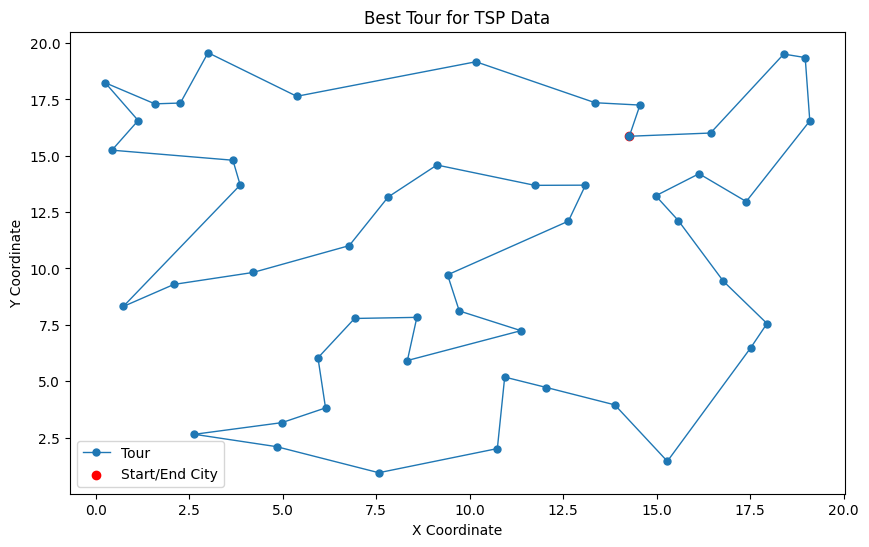

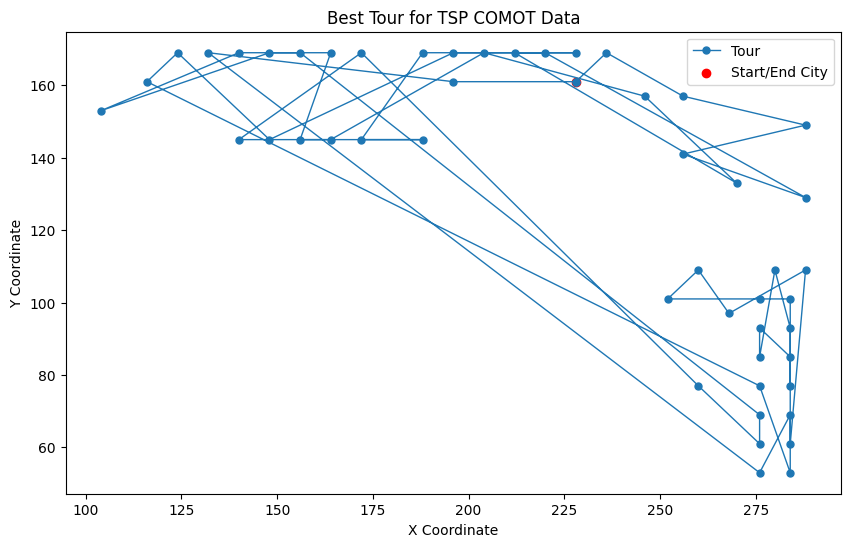

In [62]:
def plot_tour(tour, tsp_data, title):
    """
    Plot the best tour found by the algorithm.

    Parameters:
    - tour: The best tour as a list of city indices.
    - tsp_data: The TSP data as a list of city coordinates.
    - title: Title for the plot.
    """
    ordered_cities = [tsp_data[i] for i in tour] + [tsp_data[tour[0]]]  # Closing the loop
    xs, ys = zip(*ordered_cities)  # Unpacking the coordinates

    plt.figure(figsize=(10, 6))
    plt.plot(xs, ys, 'o-', markersize=5, linewidth=1, label='Tour')
    plt.scatter(xs[0], ys[0], color='red', label='Start/End City')  # Mark the start/end city.
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

plot_tour(best_tour, tsp_data, "Best Tour for TSP Data")
plot_tour(best_tour_comot, tsp_comot_data, "Best Tour for TSP COMOT Data")


#### Question 2
Comparing a simple Evolutionary Algorithm (EA) with the same number of generations to an EA enhanced with local search to determine if the addition of local search improves performance might not always constitute a fair baseline. First, (1) local search adds computational overhead. An EA with local search takes 10 times more than the simple EA, therefore it has higher computational cost per generation than a simple EA due to the additional operations required for local search. Therefore, comparing them with the same number of generations doesn't account for the increased computational effort. Furthermore, (2) local search can significantly alter the evolutionary dynamics by intensifying the search around promising solutions, potentially leading to faster convergence or better exploitation of the search space. Simply comparing the number of generations overlooks how these dynamics change the path and efficiency of the search process. Also, (3) if the performance is measured solely by the quality of the final solution without considering computational resources, then the comparison might ignore important practical considerations like time or energy efficiency.

To conduct a fair comparison, i would suggest to:
1. Instead of fixing the number of generations, equalizing the total computational budget between the two setups might be better. This could be based on the total number of fitness evaluations, total runtime, or energy consumption. This way, both algorithms expend the same amount of resources, providing a more apples-to-apples comparison.
2. Besides the quality of the final solution,  metrics such as convergence speed, computational time, and robustness across multiple runs should be added. This multi-faceted evaluation provides a more comprehensive view of the impact of local search.
3. Exploring the performance across a range of parameter settings for both the simple EA and the EA with local search is a must. This includes mutation rates, population sizes, and local search intensity. Such an exploration can reveal under what conditions the local search provides the most benefit.
4. Use statistical tests to determine if observed differences in performance are significant. This involves running each algorithm configuration multiple times on multiple problem instances and applying statistical tests (e.g., t-tests, ANOVA) to the results to assess the significance of the differences.
5. Analyze the diversity of the populations and the convergence behavior of both algorithms. This can help understand if local search leads to premature convergence or if it helps in maintaining a healthy diversity for exploring the search space effectively.

